In [1]:
import warnings
warnings.simplefilter(action='ignore')

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1. 数据预处理

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
x_train_flatten = x_train.reshape(x_train.shape[0], 784).astype('float32')
x_test_flatten = x_test.reshape(x_test.shape[0], 784).astype('float32')

In [5]:
x_train_normalize = x_train_flatten / 255.0
x_test_normalize = x_test_flatten / 255.0

In [6]:
y_train_one_hot = tf.keras.utils.to_categorical(y_train)
y_test_one_hot = tf.keras.utils.to_categorical(y_test)

### 2. 建立模型

#### 2.1 建立 Sequential 模型

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'),  # 输入层-隐藏层
    tf.keras.layers.Dense(units=10, kernel_initializer='normal', activation='softmax')  # 输出层
])

#### 2.2 查看模型的摘要

In [8]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


### 3. 训练模型

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
train_history = model.fit(x=x_train_normalize, y=y_train_one_hot, validation_split=0.2,
                         epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - loss: 12.1313 - acc: 0.2359 - val_loss: 9.5054 - val_acc: 0.3956
Epoch 2/10
 - 2s - loss: 6.8008 - acc: 0.5620 - val_loss: 5.5449 - val_acc: 0.6429
Epoch 3/10
 - 2s - loss: 5.1265 - acc: 0.6690 - val_loss: 4.6647 - val_acc: 0.6992
Epoch 4/10
 - 2s - loss: 4.5862 - acc: 0.7053 - val_loss: 4.4342 - val_acc: 0.7142
Epoch 5/10
 - 2s - loss: 4.3743 - acc: 0.7202 - val_loss: 4.3324 - val_acc: 0.7225
Epoch 6/10
 - 2s - loss: 4.2436 - acc: 0.7291 - val_loss: 4.1828 - val_acc: 0.7323
Epoch 7/10
 - 2s - loss: 3.4656 - acc: 0.7763 - val_loss: 2.8037 - val_acc: 0.8164
Epoch 8/10
 - 2s - loss: 2.6635 - acc: 0.8274 - val_loss: 2.6640 - val_acc: 0.8268
Epoch 9/10
 - 2s - loss: 2.5528 - acc: 0.8349 - val_loss: 2.5826 - val_acc: 0.8305
Epoch 10/10
 - 2s - loss: 2.4391 - acc: 0.8420 - val_loss: 2.4225 - val_acc: 0.8404


### 4. 以图形显示训练过程

In [11]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.xlabel('Epoch')
    plt.ylabel(train)
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

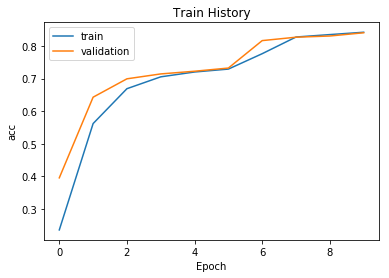

In [12]:
show_train_history(train_history, 'acc', 'val_acc')

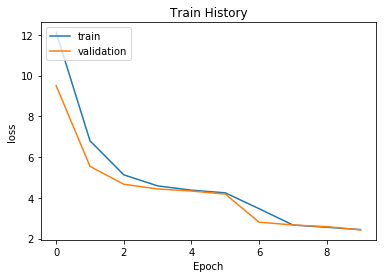

In [13]:
show_train_history(train_history, 'loss', 'val_loss')

### 5. 评估模型的准确率

In [14]:
scores = model.evaluate(x_test_normalize, y_test_one_hot)
print()
print('accuracy:', scores[1])

10000/10000 [==============================] - 0s 33us/step

accuracy: 0.8402


### 6. 进行预测

#### 6.1 执行预测

In [15]:
predictions = model.predict_classes(x_test_normalize)

#### 6.2 预测结果

In [16]:
predictions

array([7, 2, 1, ..., 4, 5, 6])

#### 6.3 定义函数以显示10项预测结果

In [17]:
def plot_images_labels_prediction(images, labels, predictions, idx, num=10):
    """
    images: 数字图像数组
    labels: 真实值数组
    predictions: 预测结果数据
    idx: 开始显示的数据index
    num: 要显示的数据项数, 默认为10, 不超过25
    """
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25:
        num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, i+1)
        ax.imshow(images[idx], cmap='binary')
        title = 'lable=' + str(labels[idx])
        if len(predictions) > 0:
            title += ',predict=' + str(predictions[idx])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

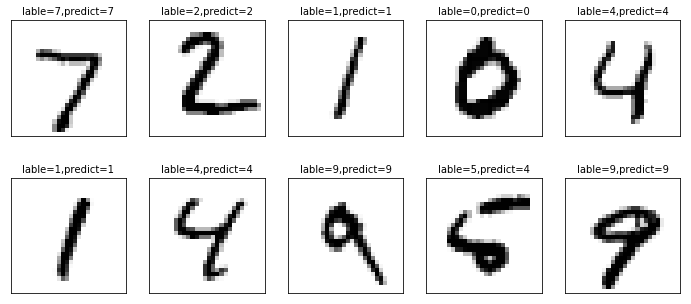

In [18]:
plot_images_labels_prediction(x_test, y_test, predictions, idx=0, num=10)

### 7. 显示混淆矩阵

#### 7.1 建立混淆矩阵

In [19]:
pd.crosstab(y_test, predictions, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,953,0,3,0,0,10,10,1,3,0
1,0,1113,7,0,1,4,4,0,6,0
2,11,1,951,7,10,2,15,10,21,4
3,35,9,190,89,5,381,10,28,242,21
4,3,4,4,7,916,0,15,3,5,25
5,18,1,9,6,12,802,16,5,18,5
6,12,3,4,5,13,15,901,0,5,0
7,5,6,29,14,11,2,1,924,5,31
8,11,3,15,16,12,16,17,13,863,8


#### 7.2 建立真实值与预测 DataFrame

In [20]:
df = pd.DataFrame({'label': y_test, 'predict': predictions})
df[:2]

,label,predict
0,7,7
1,2,2


#### 7.3 查询真实值是 "5" 但预测值是 "2" 的数据

In [21]:
df[(df.label==5)&(df.predict==2)]

,label,predict
1737,5,2
3902,5,2
5913,5,2
5922,5,2
6385,5,2
6598,5,2
7498,5,2
7779,5,2
9970,5,2


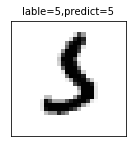

In [22]:
plot_images_labels_prediction(x_test, y_test, predictions, idx=340, num=1)

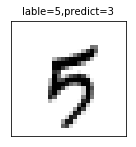

In [23]:
plot_images_labels_prediction(x_test, y_test, predictions, idx=1289, num=1)